<center><h2><b>ARE SUICIDE RATES LINKED TO THEIR COUNTRIES ECONOMIC GROWTH?</b></h2></center><br/> It seems like a no-brainer to assume that suicide rate is majorly linked to economic growth/fall of a country. But is that true? Let us find out by analyzing the suicide data taken from Kaggle. The goal of this analysis is to find out if there is any relationship between Suicide rate and GDP per capita. 

<b>Dataset, its limitations and assumptions:</b><br/>The data for this study is a csv file that includes suicide information taken from 101 countries over a span of three decades. Although the data is extensive and covers a number of years and countries, there is missing information and limited metrics that require cleaning of data and calculation of appropriate fields. <br/>Also, a number of assumptions were made to assist the data analysis. They include considering 0.5 and above and -0.5 and below for strong correlation values, dividing GDP per capita into 3 bins-low, medium and high.

<b>Quick overview of this study:</b><br/>To help me better analyze the data, I studied 2 aspects related to GDP per capita and Suicide rates. <br/>In the initial analysis, I looked at the average number of suicides with respect to the corresponding country's GDP per capita and compare them with values from other countries. This is to find out if the mean number of suicides is lower for countries with higher GDP per capita and vice versa.<br/>
For an indepth understanding, I grouped up the countries into 3 sets: one with low GDP per capita, one with medium GDP per capita and one with high GDP per capita. Then a correlation was taken between suicide rates and GDP per capita for all the years and countries involved.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
fields = ['country', 'year','sex','age','suicides_no','population','HDI for year',' gdp_for_year ($) ','gdp_per_capita ($)','generation']
df = pd.read_csv(r"C:\Users\Niranjan\Desktop\Data Science\Exercises (my work)\Kaggle datasets for capstone\suicide data.csv",usecols=fields)
df.rename(columns={' gdp_for_year ($) ':'gdp_for_year_in_dollars',
                          'gdp_per_capita ($)':'gdp_per_capita_in_dollars',
                          'HDI for year':'HDI_for_year'}, 
                 inplace=True)
print('Number of rows in this dataset:',df.country.count())
print('Year range for the dataset: {} to {}'.format(min(df.year),max(df.year)))
df.head(5)

Number of rows in this dataset: 27820
Year range for the dataset: 1985 to 2016


,country,year,sex,age,suicides_no,population,HDI_for_year,gdp_for_year_in_dollars,gdp_per_capita_in_dollars,generation
0,Albania,1987,male,15-24 years,21,312900,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,NaN,"2,156,624,900",796,Boomers


Data was cleaned to remove countries that carry no information for the time period 1991 to 2014. Also, I had to choose between HDI (Human Development Index), GDP and GDP per capita columns. Of the three, GDP per capita was promising as it is directly related to population. (Note: HDI is also a great metric for this study. But in this dataset there is a lot of missing data for HDI. So I had to opt for the next best option)

In [7]:
#Aggregate suicide data per country per year
df_aggby_ctry_yr_unfiltered = (df.groupby(['country','year']).agg({'population':sum,'suicides_no':sum,'gdp_per_capita_in_dollars':max})).reset_index()
df_aggby_ctry_yr_unfiltered['suicides_per_100k_people'] = round((100000 * df_aggby_ctry_yr_unfiltered['suicides_no']) / df_aggby_ctry_yr_unfiltered['population'],2)
df_aggby_ctry_yr_unfiltered.head(5)

,country,year,population,suicides_no,gdp_per_capita_in_dollars,suicides_per_100k_people
0,Albania,1987,2709600,73,796,2.69
1,Albania,1988,2764300,63,769,2.28
2,Albania,1989,2803100,68,833,2.43
3,Albania,1992,2822500,47,251,1.67
4,Albania,1993,2807300,73,437,2.60


In [8]:
#Choose countries based on availability of data
df_pivot = df_aggby_ctry_yr_unfiltered.query('year>1990 and year<2015').pivot_table('suicides_no', 'country', 'year').dropna(axis='rows')
#df_pivot
countries_for_analysis = pd.Series(df_pivot.index.get_values())
print('Number of countries for analysis for the years 1991 to 2014: ',countries_for_analysis.count())
countries_for_analysis.head(5)

Number of countries for analysis for the years 1991 to 2014:  39


0    Argentina
1      Austria
2      Belgium
3       Brazil
4     Bulgaria
dtype: object

In [9]:
#Filter the Aggregate data by the above 39 countries
df_aggby_ctry_yr = df_aggby_ctry_yr_unfiltered[df_aggby_ctry_yr_unfiltered.country.isin(countries_for_analysis)].query('year>1990 and year<2015').reset_index()
df_aggby_ctry_yr.head(5)

,index,country,year,population,suicides_no,gdp_per_capita_in_dollars,suicides_per_100k_people
0,55,Argentina,1991,29623000,1951,6404,6.59
1,56,Argentina,1992,30045400,2184,7615,7.27
2,57,Argentina,1993,30477500,2230,7768,7.32
3,58,Argentina,1994,30911200,2241,8328,7.25
4,59,Argentina,1995,31345400,2204,8232,7.03


In [10]:
#Calculate mean GDP per capita, minimum GDP per capita, maximum GDP per caita for those 39 countries and sort the data by mean GDP per capita ascending
df_cnt_years_by_country = df_aggby_ctry_yr.groupby('country').agg(
    {'year':['count'],
     'suicides_per_100k_people':['mean'],
     'gdp_per_capita_in_dollars':['mean', 'min','max']}).reset_index()
df_cnt_years_by_country.columns = ["_".join(x) for x in df_cnt_years_by_country.columns.ravel()]
df_cnt_years_by_country.rename(columns={'country_':'country',
                                        'year_count':'years',
                          'gdp_per_capita_in_dollars_mean':'gdp_per_capita_in_dollars',
                          'gdp_per_capita_in_dollars_min':'gdp_min',
                          'gdp_per_capita_in_dollars_max':'gdp_max'}, 
                 inplace=True)
df_cnt_years_by_country['gdp_diff'] = df_cnt_years_by_country['gdp_max'] - df_cnt_years_by_country['gdp_min']
df_cnt_years_by_country['gdp_timesgrowth'] = df_cnt_years_by_country['gdp_max'] / df_cnt_years_by_country['gdp_min']

print('count of countries:{}, mean GDP per capita:{}'.format(len(df_cnt_years_by_country),np.mean(df_cnt_years_by_country.gdp_per_capita_in_dollars)))
df_cnt_years_by_country_sorted = df_cnt_years_by_country[['country','years','gdp_per_capita_in_dollars','gdp_min','gdp_max','gdp_diff','gdp_timesgrowth','suicides_per_100k_people_mean']].sort_values('gdp_per_capita_in_dollars').reset_index()
df_cnt_years_by_country_sorted.head(39)

count of countries:39, mean GDP per capita:22991.209401709402


,index,country,years,gdp_per_capita_in_dollars,gdp_min,gdp_max,gdp_diff,gdp_timesgrowth,suicides_per_100k_people_mean
0,22,Kyrgyzstan,24,697.458333,291,1465,1174,5.034364,11.570833
1,14,Guatemala,24,2425.041667,1194,4210,3016,3.525963,2.550000
2,36,Turkmenistan,24,2696.500000,608,9046,8438,14.878289,7.622917
3,9,Ecuador,24,3513.416667,1650,7116,5466,4.312727,6.046667
4,4,Bulgaria,24,3901.875000,1213,8241,7028,6.793899,15.162083
5,6,Colombia,24,4179.291667,1348,8731,7383,6.477003,4.984583
6,31,Romania,24,4657.750000,1183,10526,9343,8.897718,12.877083
7,21,Kazakhstan,24,5206.250000,1225,15552,14327,12.695510,27.635000
8,7,Costa Rica,24,5815.041667,2651,11485,8834,4.332327,6.711667
9,25,Mauritius,24,5997.666667,3045,11120,8075,3.651888,11.651667


<b><font color="red">Question 1:</font><br/>
How is average number of suicides varying across countries with different levels of GDP per capita?</b>
<br/><br/>
With the above processed data, I proceeded to check how the average number of suicides are varying across 39 countries that are sorted in ascending order of their mean GDP per capita. 

Text(0, 0.5, 'Suicides per 100k population')

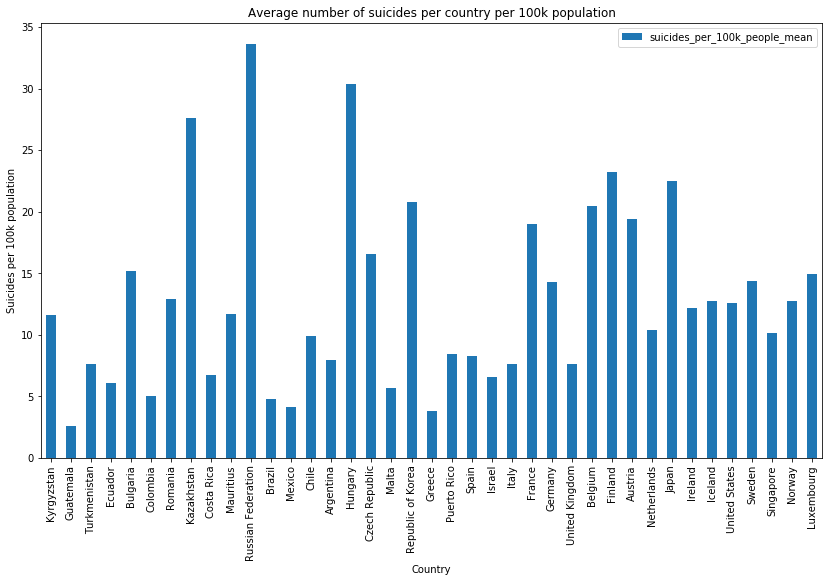

In [11]:
#Sort countries by ascending GDP per capita and make a Bar plot
SuicidesPlotPer100k = df_cnt_years_by_country_sorted.plot.bar(x='country', y='suicides_per_100k_people_mean', figsize=(14,8),
                                    title="Average number of suicides per country per 100k population")
SuicidesPlotPer100k.set_xlabel("Country")
SuicidesPlotPer100k.set_ylabel("Suicides per 100k population")

Looking at the bar plot, it seems that the average number of suicides do not follow a set pattern based on the countries GDP per capita levels. Just studying the above graph would conclude that there is no relation between the two variables (suicides and GDP per capita). But I wanted to further my study to see if there is a trend followed by 39 countries in different GDP per capita groups. For that I divided the countries into 3 groups and calcluated correlation between suicides and GDP per capita for all the years.
<br/><br/><b><font color="red">Question 2:</font><br/>
Considering each year's data, is there a correlation between GDP per capita and number of suicides per country? If so, how is the trend different for the 3 groups of GDP per capita? (low, medium and high GDP per capita groups)</b>

In [12]:
#divide the data into 3 groups and 13 each. Low mean GDP per capita group, high mean GDP per capita group and medium mean GDP per capita group
df_cnt_years_by_country_lowGDP = df_cnt_years_by_country_sorted.loc[0:12]
df_cnt_years_by_country_mediumGDP = df_cnt_years_by_country_sorted.loc[13:25]
df_cnt_years_by_country_highGDP = df_cnt_years_by_country_sorted.loc[26:38]

#take the above 39 countries that have 24 years of data and find out the correlation between number of suicides and GDP pr caita
df_corr = (df_aggby_ctry_yr.groupby('country')[['suicides_per_100k_people','gdp_per_capita_in_dollars']].corr(method='pearson').iloc[0::2,-1]).reset_index()
df_corr.rename(columns={'gdp_per_capita_in_dollars':'correlation_value'}, inplace=True)
df_corr = df_corr.drop(['level_1'], axis=1)
df_corr = pd.merge(df_corr, df_cnt_years_by_country, on="country")
#df_corr.head(5)

#Check the correlations for each group
df_corr_lowGDP = df_corr[df_corr.country.isin(df_cnt_years_by_country_lowGDP.country)].reset_index()
df_corr_mediumGDP = df_corr[df_corr.country.isin(df_cnt_years_by_country_mediumGDP.country)].reset_index()
df_corr_highGDP = df_corr[df_corr.country.isin(df_cnt_years_by_country_highGDP.country)].reset_index()

In [13]:
df_corr_lowGDP

,index,country,correlation_value,years,suicides_per_100k_people_mean,gdp_per_capita_in_dollars,gdp_min,gdp_max,gdp_diff,gdp_timesgrowth
0,3,Brazil,0.832451,24,4.757500,6808.416667,2924,14245,11321,4.871751
1,4,Bulgaria,-0.937996,24,15.162083,3901.875000,1213,8241,7028,6.793899
2,6,Colombia,0.091214,24,4.984583,4179.291667,1348,8731,7383,6.477003
3,7,Costa Rica,0.299416,24,6.711667,5815.041667,2651,11485,8834,4.332327
4,9,Ecuador,0.336334,24,6.046667,3513.416667,1650,7116,5466,4.312727
5,14,Guatemala,0.793202,24,2.550000,2425.041667,1194,4210,3016,3.525963
6,21,Kazakhstan,-0.629430,24,27.635000,5206.250000,1225,15552,14327,12.695510
7,22,Kyrgyzstan,-0.628117,24,11.570833,697.458333,291,1465,1174,5.034364
8,25,Mauritius,-0.695094,24,11.651667,5997.666667,3045,11120,8075,3.651888
9,26,Mexico,0.886209,24,4.133333,8126.958333,4204,11663,7459,2.774263


In [14]:
df_corr_mediumGDP

,index,country,correlation_value,years,suicides_per_100k_people_mean,gdp_per_capita_in_dollars,gdp_min,gdp_max,gdp_diff,gdp_timesgrowth
0,0,Argentina,-0.304579,24,7.915833,8625.291667,2840,14206,11366,5.002113
1,5,Chile,0.637600,24,9.925000,8518.958333,3187,17140,13953,5.378099
2,8,Czech Republic,-0.745651,24,16.566250,12199.625000,3070,23811,20741,7.756026
3,11,France,-0.810655,24,19.006250,34903.333333,23821,49901,26080,2.094832
4,12,Germany,-0.730310,24,14.293750,35313.458333,24662,50167,25505,2.034182
5,13,Greece,0.123615,24,3.812083,19330.208333,10816,33168,22352,3.066568
6,15,Hungary,-0.913921,24,30.381667,9073.583333,3561,16540,12979,4.644763
7,18,Israel,-0.742692,24,6.597917,25457.916667,15267,41869,26602,2.742451
8,19,Italy,-0.773575,24,7.605417,29317.500000,19605,41935,22330,2.138995
9,24,Malta,0.440098,24,5.639167,15638.041667,8022,27634,19612,3.444777


In [15]:
df_corr_highGDP

,index,country,correlation_value,years,suicides_per_100k_people_mean,gdp_per_capita_in_dollars,gdp_min,gdp_max,gdp_diff,gdp_timesgrowth
0,1,Austria,-0.881911,24,19.389167,37655.166667,23808,54294,30486,2.280494
1,2,Belgium,-0.676031,24,20.457917,35646.916667,22523,51345,28822,2.279670
2,10,Finland,-0.874100,24,23.187500,36852.416667,18826,56521,37695,3.002284
3,16,Iceland,0.024873,24,12.748750,42025.625000,25474,73590,48116,2.888828
4,17,Ireland,0.035061,24,12.142917,40068.333333,15328,67173,51845,4.382372
5,20,Japan,0.050160,24,22.520417,39956.791667,30688,51379,20691,1.674237
6,23,Luxembourg,-0.791152,24,14.915417,78046.125000,39465,126352,86887,3.201622
7,27,Netherlands,-0.257227,24,10.420833,39489.916667,22906,60375,37469,2.635772
8,28,Norway,-0.691737,24,12.775833,63095.791667,30066,109804,79738,3.652099
9,33,Singapore,-0.419906,24,10.177083,43153.041667,17768,84442,66674,4.752476


In [16]:
#count the countries that have a correlation greater than 0.5 and less than -0.5
df_corr_filter = df_corr.query('correlation_value >= 0.5 or correlation_value <= -0.5').reset_index()
print('Number of countries with strong correlation: ',len(df_corr_filter))
#df_corr_filter.sort_values('correlation_value').head(5)

print('Number of countries that have low correlation from {} countries: {}'.format(len(df_corr),len(df_corr_filter)))
print('Number of countries with a positive correlation: ',len(df_corr_filter[df_corr_filter.correlation_value>0]))
print('Number of countries with a negative correlation: ',len(df_corr_filter[df_corr_filter.correlation_value<0]))

#countries that do not have a correlation
df_nocorr_filter = df_corr.query('correlation_value < 0.5 and correlation_value > -0.5').reset_index()
print('Number of countries with no correlation: ',len(df_nocorr_filter))
#df_nocorr_filter.head(5)

df_corr_lowGDP_filter = df_corr_filter[df_corr_filter.country.isin(df_corr_lowGDP['country'])]
print('Number of countries that have high correlation from {} low GDP per capita countries: {}'.format(len(df_corr_lowGDP),len(df_corr_lowGDP_filter)))
print('Number of countries with a positive correlation: ',len(df_corr_lowGDP_filter[df_corr_lowGDP_filter.correlation_value>0]))
print('Number of countries with a negative correlation: ',len(df_corr_lowGDP_filter[df_corr_lowGDP_filter.correlation_value<0]))

df_corr_mediumGDP_filter = df_corr_filter[df_corr_filter.country.isin(df_corr_mediumGDP['country'])]
print('Number of countries that have high correlation from {} medium GDP per capita countries: {}'.format(len(df_corr_mediumGDP),len(df_corr_mediumGDP_filter)))
print('Number of countries with a positive correlation: ',len(df_corr_mediumGDP_filter[df_corr_mediumGDP_filter.correlation_value>0]))
print('Number of countries with a negative correlation: ',len(df_corr_mediumGDP_filter[df_corr_mediumGDP_filter.correlation_value<0]))

df_corr_HighGDP_filter = df_corr_filter[df_corr_filter.country.isin(df_corr_highGDP['country'])]
print('Number of countries that have high correlation from {} high GDP per capita countries: {}'.format(len(df_corr_highGDP),len(df_corr_HighGDP_filter)))
print('Number of countries with a positive correlation: ',len(df_corr_HighGDP_filter[df_corr_HighGDP_filter.correlation_value>0]))
print('Number of countries with a negative correlation: ',len(df_corr_HighGDP_filter[df_corr_HighGDP_filter.correlation_value<0]))

Number of countries with strong correlation:  25
Number of countries that have low correlation from 39 countries: 25
Number of countries with a positive correlation:  5
Number of countries with a negative correlation:  20
Number of countries with no correlation:  14
Number of countries that have high correlation from 13 low GDP per capita countries: 9
Number of countries with a positive correlation:  3
Number of countries with a negative correlation:  6
Number of countries that have high correlation from 13 medium GDP per capita countries: 9
Number of countries with a positive correlation:  2
Number of countries with a negative correlation:  7
Number of countries that have high correlation from 13 high GDP per capita countries: 7
Number of countries with a positive correlation:  0
Number of countries with a negative correlation:  7


In [17]:
#countries and their GDPs with +ve correlation
df_countries_pc = df_cnt_years_by_country[df_cnt_years_by_country.country.isin(df_corr_filter[df_corr_filter.correlation_value>0]['country'])]
print('Positive correlation stats - Min GDP: {}, Max GDP: {}, Mean GDP: {}'.format(round(min(df_countries_pc.gdp_per_capita_in_dollars),2),round(max(df_countries_pc.gdp_per_capita_in_dollars),2),round(df_countries_pc.gdp_per_capita_in_dollars.mean(),2)))
#df_countries_pc.sort_values('gdp_per_capita_in_dollars')

#countries and their GDPs with -ve correlation
df_countries_nc = df_cnt_years_by_country[df_cnt_years_by_country.country.isin(df_corr_filter[df_corr_filter.correlation_value<0]['country'])]
df_countries_nc = df_countries_nc.sort_values('gdp_per_capita_in_dollars')
print('Negative correlation stats - Min GDP: {}, Max GDP: {}, Mean GDP: {}'.format(round(min(df_countries_nc.gdp_per_capita_in_dollars),2),round(max(df_countries_nc.gdp_per_capita_in_dollars),2),round(df_countries_nc.gdp_per_capita_in_dollars.mean(),2)))
#df_countries_nc.sort_values('gdp_per_capita_in_dollars').head(5)

Positive correlation stats - Min GDP: 2425.04, Max GDP: 16767.67, Mean GDP: 8529.41
Negative correlation stats - Min GDP: 697.46, Max GDP: 78046.12, Mean GDP: 26069.63


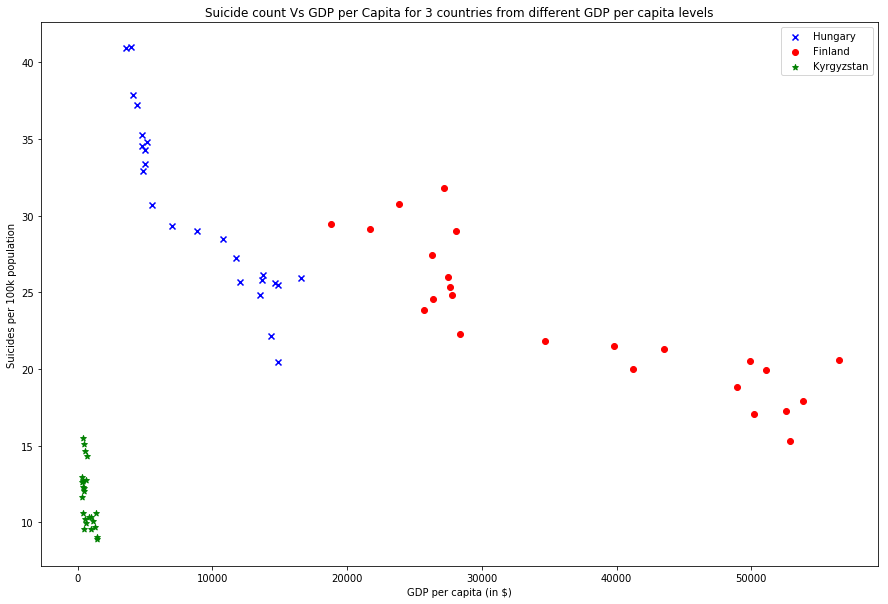

In [27]:
df_scatter_hungary = df_aggby_ctry_yr[df_aggby_ctry_yr.country.isin(['Hungary'])]
df_scatter_Finland = df_aggby_ctry_yr[df_aggby_ctry_yr.country.isin(['Finland'])]
df_scatter_Kyrgyzstan = df_aggby_ctry_yr[df_aggby_ctry_yr.country.isin(['Kyrgyzstan'])]

N = len(df_scatter_hungary)
x_hungary = df_scatter_hungary['gdp_per_capita_in_dollars']
y_hungary = df_scatter_hungary['suicides_per_100k_people']
x_Finland = df_scatter_Finland['gdp_per_capita_in_dollars']
y_Finland = df_scatter_Finland['suicides_per_100k_people']
x_Kyrgyzstan = df_scatter_Kyrgyzstan['gdp_per_capita_in_dollars']
y_Kyrgyzstan = df_scatter_Kyrgyzstan['suicides_per_100k_people']

plt.title('Suicide count Vs GDP per Capita for 3 countries from different GDP per capita levels')
plt.rcParams['figure.figsize'] = [15, 10]
plt.scatter(x_hungary, y_hungary, marker='x', color='b', label="Hungary")
plt.scatter(x_Finland, y_Finland, marker='o', color='r', label="Finland")
plt.scatter(x_Kyrgyzstan, y_Kyrgyzstan, marker='*', color='g', label="Kyrgyzstan")
plt.legend(loc='upper right')
plt.xlabel("GDP per capita (in $)")
plt.ylabel("Suicides per 100k population")
plt.show()

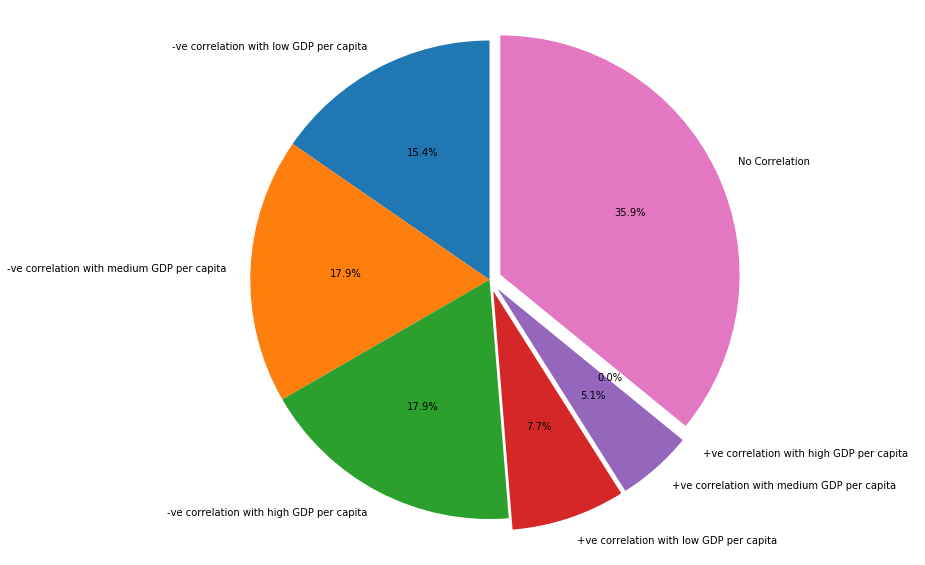

In [28]:
#Pie chart to summarize 
labels =  '-ve correlation with low GDP per capita', '-ve correlation with medium GDP per capita', '-ve correlation with high GDP per capita', '+ve correlation with low GDP per capita', '+ve correlation with medium GDP per capita', '+ve correlation with high GDP per capita', 'No Correlation'
sizes = [len(df_corr_lowGDP_filter[df_corr_lowGDP_filter.correlation_value<0]), 
         len(df_corr_mediumGDP_filter[df_corr_mediumGDP_filter.correlation_value<0]),
         len(df_corr_HighGDP_filter[df_corr_HighGDP_filter.correlation_value<0]), 
         len(df_corr_lowGDP_filter[df_corr_lowGDP_filter.correlation_value>0]), 
         len(df_corr_mediumGDP_filter[df_corr_mediumGDP_filter.correlation_value>0]), 
         len(df_corr_HighGDP_filter[df_corr_HighGDP_filter.correlation_value>0]),
         len(df_nocorr_filter)]
explode = (0, 0, 0, 0.05, 0.05, 0.05, 0.05)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')

plt.show()

In summary, more than 50% of the countries have a negative correlation with GDP per capita. In other words, atleast half of the countries in our study have decreasing suicide rates with economy increasing. For most of the remaining countries, GDP per capita has no significant impact on the number of suicides. Looking at the statistics, it is evident that there are other compelling factors to consider along with economic conditions to determine the cause for suicides. 

<br/><br/><b><font color="red">Question 3:</font><br/>
If we take top 10 countries with highest suicide levels, is the suicide count sensitive to changes in GDP per capita?</b>

In [29]:
#top 10 countries with highest suicide rates over a period of 25 years
df_top10_mean_suicides_per_country = (df_aggby_ctry_yr.groupby(['country']).agg({'suicides_per_100k_people':'mean'})).sort_values('suicides_per_100k_people', ascending=False).nlargest(10, 'suicides_per_100k_people').reset_index()
#df_top10_mean_suicides_per_country

#Correlation for top 10 highest suicide rate countries
df_corr_top10Suicide_countries = df_corr[df_corr.country.isin(df_top10_mean_suicides_per_country.country)]
df_corr_top10Suicide_countries[['country','gdp_per_capita_in_dollars','correlation_value']]

,country,gdp_per_capita_in_dollars,correlation_value
1,Austria,37655.166667,-0.881911
2,Belgium,35646.916667,-0.676031
8,Czech Republic,12199.625000,-0.745651
10,Finland,36852.416667,-0.874100
11,France,34903.333333,-0.810655
15,Hungary,9073.583333,-0.913921
20,Japan,39956.791667,0.050160
21,Kazakhstan,5206.250000,-0.629430
30,Republic of Korea,16767.666667,0.864095
32,Russian Federation,6603.833333,-0.916774


<b>An interesting observation:</b> 8 of 10 countries with highest suicide rates have a strong relationship with GDP per capita. The number of suicides are decreasing as the countries economy is getting better.